In [4409]:
path = "/home/fedflorio/master_thesis/MatrixProductBP.jl/notebooks/sis_inference_data/sigmoid_karate_snaps_step16_nobs100.jld2"
;

In [4410]:
using Pkg
Pkg.activate("/home/fedflorio/master_thesis/")

  Activating project at `~/master_thesis`


In [4411]:
using MatrixProductBP, MatrixProductBP.Models
using JLD2, SparseArrays, PyPlot
include("/home/fedflorio/master_thesis/Utilities/roc.jl");

In [4412]:
D = load(path)

data = D["data"]
λ_true = D["λ"]
params_history = D["params_history"]
;

In [4413]:
data.λ

34-element Vector{Vector{Float64}}:
 [0.029504994871542452, 0.034516376736408054, 0.028787568080027352, 0.030962606738412803, 0.031035076117850568, 0.02925400808585827, 0.03190200425482238, 0.027535087634630234, 0.029297854120629803, 0.027986885890097308  …  0.027439814649922636, 0.02873428993211741, 0.029793512147920448, 0.029886182788638273, 0.028898519027917013, 0.028141595579246965, 0.029801438211816706, 0.03203060352833425, 0.028904739401641493, 0.02874925326917507]
 [0.020545897030159358, 0.011568315076038503, 0.020164420821948234, 0.02646254194030595, 0.01783527041620352, 0.021639937790431926, 0.018925186992399066, 0.01961491832568897, 0.02327355009193499, 0.01676825328700764  …  0.025532128493779113, 0.020949459075625593, 0.019591330648369897, 0.025579346895091885, 0.021307007193564646, 0.021532165270305836, 0.023499435169051532, 0.01808870597975553, 0.02039687829678984, 0.018294186474038406]
 [0.03790336490926182, 0.028582544155209264, 0.029886415224080833, 0.02980942108677507

In [4414]:
timept = 1
timept = length(params_history)

_data = [params_history[timept].λ[i][j] for i in eachindex(params_history[timept].λ) for j in eachindex(params_history[timept].λ[i])]
_history = [params_history[timept-1].λ[i][j] for i in eachindex(params_history[timept-1].λ) for j in eachindex(params_history[timept-1].λ[i])]

Δ = maximum((_data .- _history)./_data)
println("Δ($(timept)) = $(Δ)")

Δ(30) = 0.024357676201824992


auc = 0.6844707225142008


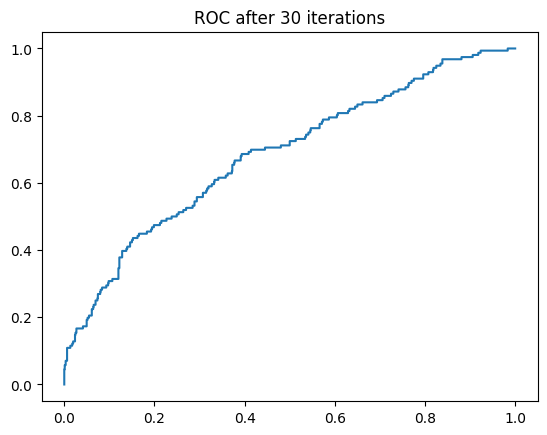

In [4415]:
λ = params_history[timept].λ
λ = data.λ
xplot, yplot, area = roccurve(λ, λ_true)
close("all")
plot(xplot,yplot)
title("ROC after $(length(params_history)) iterations")
println("auc = $area")

In [4416]:
auc_iterations = []
for p in params_history
    area = roccurve(p.λ, λ_true)[3]
    push!(auc_iterations, area)
    println(area)
end

m = argmax(auc_iterations)
println("\nMax AUC for $(m) iterations\nAUC = $(auc_iterations[m])")

0.5087991718426501
0.6495527419440463
0.6645697297871211
0.6702566756914583
0.6733357222487657
0.6789496735148909
0.7003105590062112
0.7054334554334555
0.7046371502893242
0.7039602909168127
0.7033166109253066
0.7023079577427404
0.7012395816743643
0.6998991346817434
0.6986515899559378
0.6974305887349366
0.696402027923767
0.6954398258746085
0.6947563306258958
0.693634867547911
0.6942520040346127
0.6972116048203004
0.6967006423528163
0.6955459998938259
0.6944908955778522
0.6928451982799809
0.6909008865530605
0.6888835801879281
0.686687105165366
0.6844707225142008

Max AUC for 8 iterations
AUC = 0.7054334554334555
